In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設定 Noto Sans CJK 字型
rcParams['font.sans-serif'] = ['Noto Sans CJK TC']  # 使用繁體中文字型
rcParams['axes.unicode_minus'] = False  # 避免負號顯示問題

# 設置支持中文的字型
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 動態設置字型
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 替換為找到的字型名稱
rcParams['axes.unicode_minus'] = False

# 設定區域：修改這裡來篩選特定時間區段和股票 ID
start_date = "2024-04-01"  # 起始日期
end_date = "2024-08-31"    # 結束日期
stock_id = 1783            # 股票代號

# 讀取原始資料
daily_df = pd.read_csv("data/stock_daily.csv")
macd_df = pd.read_csv("data/stock_index_macd.csv")
kdj_df = pd.read_csv("data/stock_index_kdj.csv")
daily_3_df = pd.read_csv("data/stock_daily_3.csv")
daily_mt_df = pd.read_csv("data/stock_daily_mt.csv")
monthly_revenue_df = pd.read_csv("data/stock_monthly_revenue.csv")

# 定義函數：將民國日期轉為西元日期
def convert_minguo_to_gregorian(df, column):
    df[column] = df[column].astype(str)  # 確保為字串
    df[column] = df[column].apply(lambda x: f"{int(x[:3]) + 1911}{x[3:]}" if len(x) == 7 and x.isdigit() else x)
    return df

# 定義日期解析函數，包含民國處理邏輯
def parse_dates(df, column, date_format="%Y%m%d"):
    df = convert_minguo_to_gregorian(df, column)  # 先轉換民國日期
    df[column] = pd.to_datetime(df[column], format=date_format, errors='coerce')
    invalid_dates = df[df[column].isna()]  # 找出無效日期
    if not invalid_dates.empty:
        print(f"警告: 以下行包含無法轉換的日期格式:\n{invalid_dates}")
    return df.dropna(subset=[column])  # 移除無效日期

# 解析和過濾日期
daily_df = parse_dates(daily_df, 'sdate')
daily_df = daily_df[(daily_df['id'] == stock_id) & 
                    (daily_df['sdate'] >= start_date) & 
                    (daily_df['sdate'] <= end_date)]

macd_df = parse_dates(macd_df, 'sdate')
macd_df = macd_df[(macd_df['id'] == stock_id) & 
                  (macd_df['sdate'] >= start_date) & 
                  (macd_df['sdate'] <= end_date)]

kdj_df = parse_dates(kdj_df, 'sdate')
kdj_df = kdj_df[(kdj_df['id'] == stock_id) & 
                (kdj_df['sdate'] >= start_date) & 
                (kdj_df['sdate'] <= end_date)]

daily_3_df = parse_dates(daily_3_df, 'sdate')
daily_3_df = daily_3_df[(daily_3_df['id'] == stock_id) & 
                        (daily_3_df['sdate'] >= start_date) & 
                        (daily_3_df['sdate'] <= end_date)]

daily_mt_df = parse_dates(daily_mt_df, 'sdate')
daily_mt_df = daily_mt_df[(daily_mt_df['id'] == stock_id) & 
                          (daily_mt_df['sdate'] >= start_date) & 
                          (daily_mt_df['sdate'] <= end_date)]

monthly_revenue_df['yyyymm'] = pd.to_datetime(monthly_revenue_df['yyyymm'].astype(str) + '01', format='%Y%m%d', errors='coerce')
monthly_revenue_df = monthly_revenue_df[(monthly_revenue_df['id'] == stock_id) & 
                                        (monthly_revenue_df['yyyymm'] >= start_date) & 
                                        (monthly_revenue_df['yyyymm'] <= end_date)]

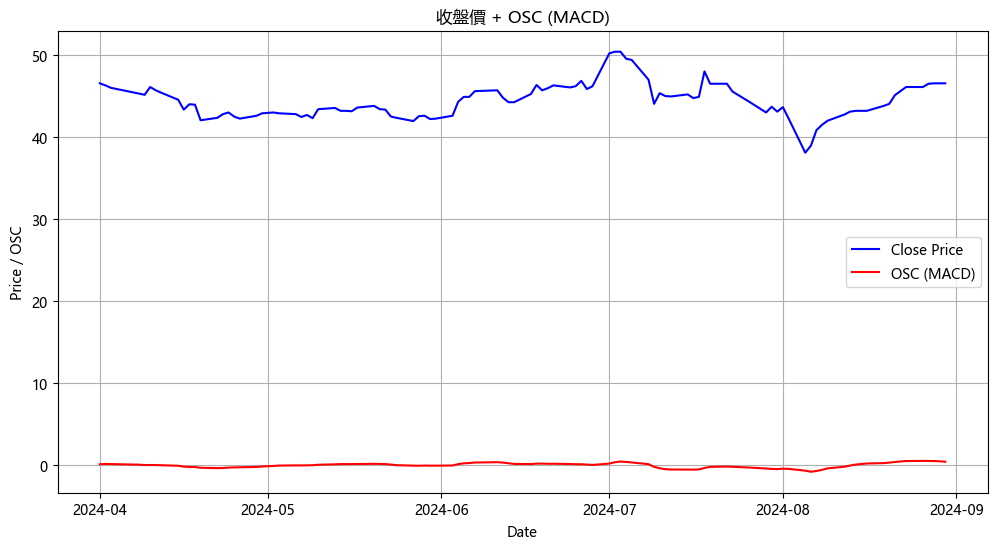

In [2]:
# Chart 1: 收盤價 + OSC (MACD)
plt.figure(figsize=(12, 6))
plt.plot(daily_df['sdate'], daily_df['close_price'], label='Close Price', color='blue')
plt.plot(macd_df['sdate'], macd_df['OSC'], label='OSC (MACD)', color='red')
plt.title("收盤價 + OSC (MACD)")
plt.xlabel("Date")
plt.ylabel("Price / OSC")
plt.legend()
plt.grid()
plt.show()

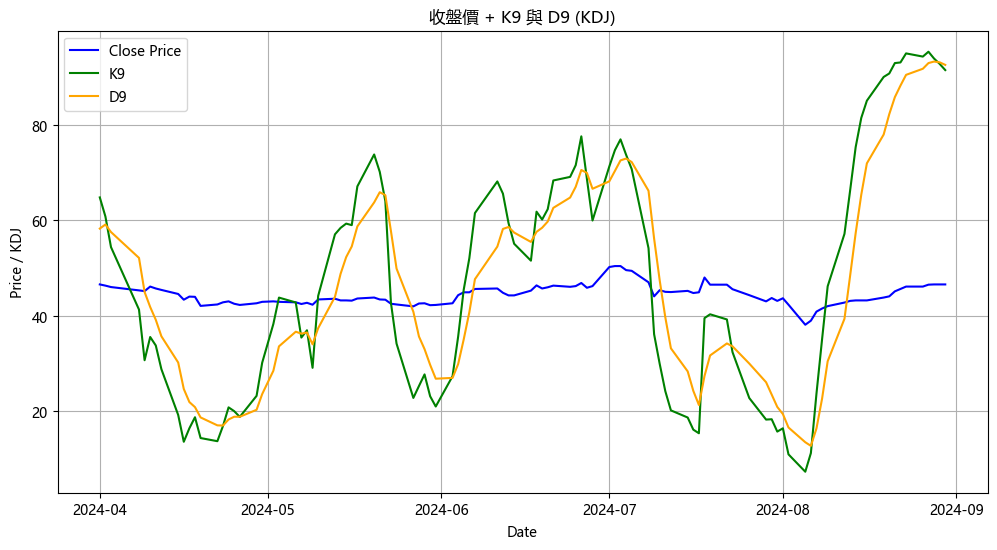

In [3]:
# Chart 2: 收盤價 + K9 與 D9 (KDJ)
plt.figure(figsize=(12, 6))
plt.plot(daily_df['sdate'], daily_df['close_price'], label='Close Price', color='blue')
plt.plot(kdj_df['sdate'], kdj_df['K9'], label='K9', color='green')
plt.plot(kdj_df['sdate'], kdj_df['D9'], label='D9', color='orange')
plt.title("收盤價 + K9 與 D9 (KDJ)")
plt.xlabel("Date")
plt.ylabel("Price / KDJ")
plt.legend()
plt.grid()
plt.show()

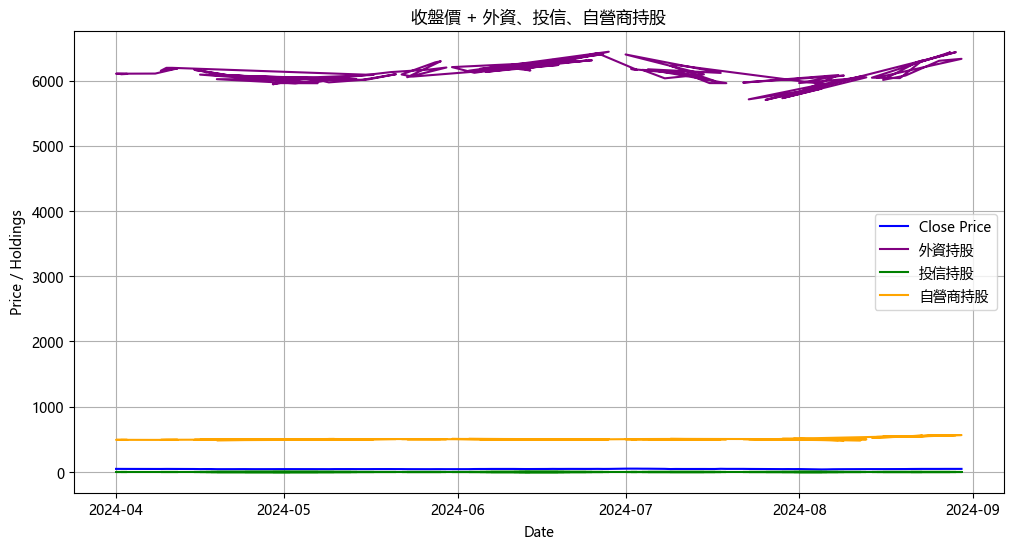

In [4]:
# Chart 3: 收盤價 + 外資、投信、自營商持股
plt.figure(figsize=(12, 6))
plt.plot(daily_df['sdate'], daily_df['close_price'], label='Close Price', color='blue')
plt.plot(daily_3_df['sdate'], daily_3_df['est_f_qty'], label='外資持股', color='purple')
plt.plot(daily_3_df['sdate'], daily_3_df['est_i_qty'], label='投信持股', color='green')
plt.plot(daily_3_df['sdate'], daily_3_df['est_s_qty'], label='自營商持股', color='orange')
plt.title("收盤價 + 外資、投信、自營商持股")
plt.xlabel("Date")
plt.ylabel("Price / Holdings")
plt.legend()
plt.grid()
plt.show()

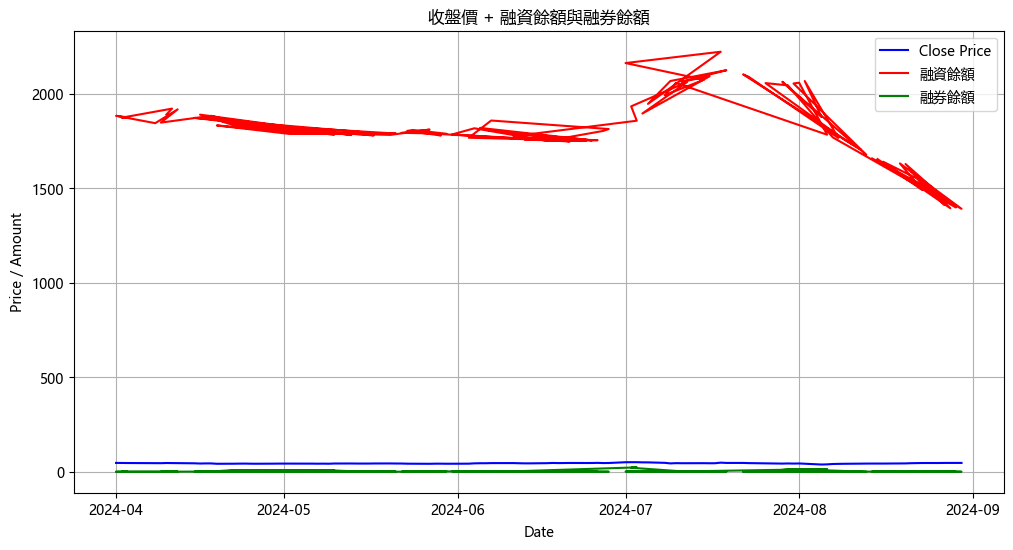

In [5]:
# Chart 4: 收盤價 + 融資餘額與融券餘額
plt.figure(figsize=(12, 6))
plt.plot(daily_df['sdate'], daily_df['close_price'], label='Close Price', color='blue')
plt.plot(daily_mt_df['sdate'], daily_mt_df['mt_qty'], label='融資餘額', color='red')
plt.plot(daily_mt_df['sdate'], daily_mt_df['ss_qty'], label='融券餘額', color='green')
plt.title("收盤價 + 融資餘額與融券餘額")
plt.xlabel("Date")
plt.ylabel("Price / Amount")
plt.legend()
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

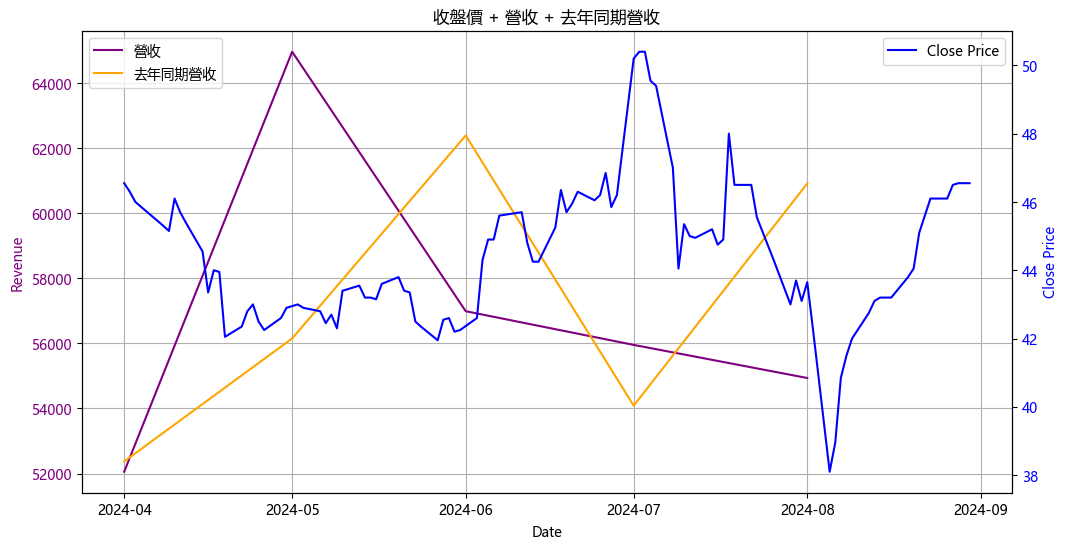

In [6]:
# Chart 5: 收盤價 + 營收 + 去年同期營收（添加單獨 y 軸）
plt.figure(figsize=(12, 6))

# 第一個 y 軸 - 營收數據
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(monthly_revenue_df['yyyymm'], monthly_revenue_df['month_amt'], label='營收', color='purple')
ax1.plot(monthly_revenue_df['yyyymm'], monthly_revenue_df['pre_y_amt'], label='去年同期營收', color='orange')
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')
ax1.grid()

# 第二個 y 軸 - Close Price
ax2 = ax1.twinx()
ax2.plot(daily_df['sdate'], daily_df['close_price'], label='Close Price', color='blue')
ax2.set_ylabel("Close Price", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title("收盤價 + 營收 + 去年同期營收")
plt.show()
